STATE, SYSTEM, and maybe UPDATE FUNC

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

In [2]:
#r_0 = 1000
#l_0 = 0
#e_0 = 0
#v_0 = 4* 10**(-7)
state = State(R = 200, L= 0, E= 0, V= 4* 10**(-7))

,values
R,2.000000e+02
L,0.000000e+00
E,0.000000e+00
V,4.000000e-07


In [3]:
system = System(gamma = 1.36,
               tau = 0.2,
               meu = 1.36* 10**(-3),
               beta = 0.00027,
               p = 0.1,
               alpha = 3.6 * 10**(-2),
               delta = 0.33,
               pi = 100,
               sigma = 2,
               t_0= 0,
               t_end = 120,
               dt=0.1)

,values
gamma,1.36000
tau,0.20000
meu,0.00136
beta,0.00027
p,0.10000
alpha,0.03600
delta,0.33000
pi,100.00000
sigma,2.00000
t_0,0.00000


In [4]:
def update(state, t, system):
    
    R2 = (system.gamma * system.tau - system.meu * state.R - system.beta * state.R * state.V) * system.dt + state.R
    L2 = (system.p * system.beta * state.R * state.V - system.meu * state. L - system.alpha * state.L) * system.dt + state.L
    E2 = ((1-system.p) * system.beta * state.R * state.V + system.alpha * state.L - system.delta * state.E) * system.dt + state.E
    V2 = (system.pi * state.E - system.sigma * state.V) * system.dt + state.V
    state = State(R = R2, L = L2, E = E2, V=V2)
    return(state)


In [5]:
def run_simulation(system, update):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=state.index)
    frame.row[t_0] = state
    
    for t in linrange(t_0, t_end, dt):
        frame.row[t+dt] = update(frame.row[t], t, system)
    
    return frame

In [6]:
results = run_simulation(system, update)
results.head()

,R,L,E,V
0.0,200.0,0.000000e+00,0.000000e+00,4.000000e-07
0.1,200.0,2.160000e-10,1.944000e-09,3.200000e-07
0.2,200.0,3.879930e-10,3.435826e-09,2.754400e-07
0.3,200.0,5.352811e-10,4.662479e-09,2.547103e-07
0.4,200.0,6.708248e-10,5.748436e-09,2.503930e-07


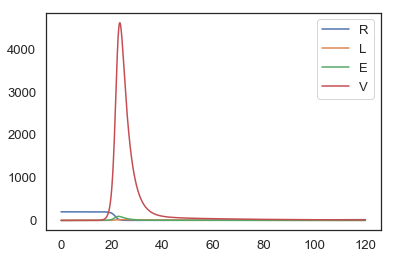

In [7]:
results.plot()